## Import required packages

In [1]:
import numpy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time

## R<sup>2</sup> for one explonatory variable model

### Function to retrieve an R<sup>2</sup> of a simulated model

In [2]:
def sim_r_squared(n: int) -> float:

    x = numpy.array([numpy.random.normal() for _ in range(n)])
    x = x.reshape((-1, 1))
    y = numpy.array([x[i] + 1 + numpy.random.normal() for i in range(n)])

    model = LinearRegression().fit(x, y)

    r_sq = model.score(x, y)

    return r_sq

### Create simulation to visualize R<sup>2</sup> uncertainty dependent on the sample size

### Set simulation parameters

In [3]:
max_sample_size = 200
increase_sample_size_by = 10
reps_per_sample_size = 10_000

### Run simulation

Calculating done after: 371.54767203330994 seconds


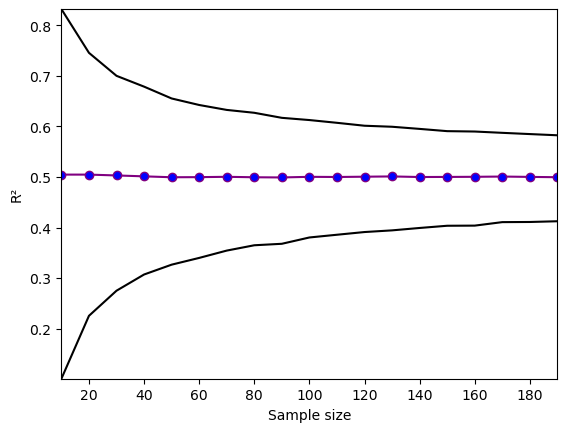

In [4]:
sample_size_list = list(range(10, max_sample_size, increase_sample_size_by))
start = time.time()

mean_ = []
q_95 = []
q_05 = []

for sample_size in sample_size_list:
    #print(step)
    result = [sim_r_squared(sample_size) for _ in range(reps_per_sample_size)]
    mean_.append(numpy.mean(result))
    q_95.append(numpy.quantile(result, 0.95))
    q_05.append(numpy.quantile(result, 0.05))

print(f"Calculating done after: {time.time() - start} seconds")

fig, ax = plt.subplots()
ax.plot(sample_size_list, mean_, marker = "o", color = "purple", mfc = "blue")
ax.plot(sample_size_list, q_95, color = "black")
ax.plot(sample_size_list, q_05, color = "black")
ax.set(xlim=(sample_size_list[0], sample_size_list[-1]), ylim=(min(q_05), max(q_95)))
plt.ylabel("R\u00b2")
plt.xlabel("Sample size")
plt.show()

## R<sup>2</sup> for multiple explonatory variables model

### Function to retrieve an R<sup>2</sup> of a simulated model

In [5]:
def sim_r_squared_k(n: int, k: int, reps: int) -> list:

    result = list()

    for _ in range(reps):

        x = numpy.random.normal(0, 1, [n, k])
        y = numpy.add(numpy.sum(x, axis = 1), numpy.random.normal(0, 1, n))
        
        model = LinearRegression().fit(x, y)
        r_sq = model.score(x, y)

        result.append(r_sq)

    return result

### Create simulation to visualize R<sup>2</sup> uncertainty dependent on the sample size

### Set simulation parameters

In [6]:
number_of_explonatory_variables = 9
max_sample_size = 200
reps_per_sample_size = 10_000
increase_sample_size_by = 10

### Run simulation

Calculating done after: 170.4774079322815 seconds


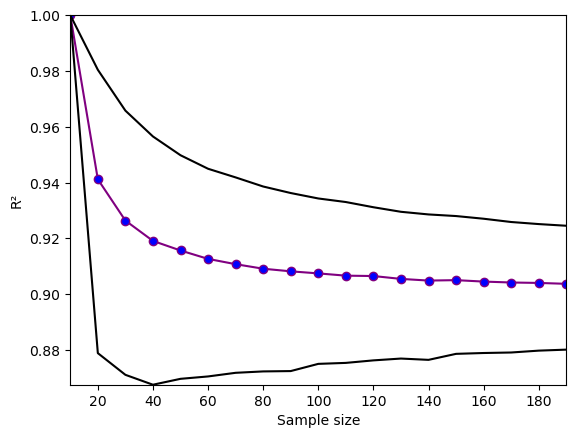

In [7]:
sample_size_list = list(range(10, max_sample_size, increase_sample_size_by))
start = time.time()

mean_ = []
q_95 = []
q_05 = []

for sample_size in sample_size_list:

    result = sim_r_squared_k(sample_size, number_of_explonatory_variables, reps_per_sample_size)
    mean_.append(numpy.mean(result))
    q_95.append(numpy.quantile(result, 0.95))
    q_05.append(numpy.quantile(result, 0.05))

print(f"Calculating done after: {time.time() - start} seconds")

fig, ax = plt.subplots()
ax.plot(sample_size_list, mean_, marker = "o", color = "purple", mfc = "blue")
ax.plot(sample_size_list, q_95, color = "black")
ax.plot(sample_size_list, q_05, color = "black")
ax.set(xlim=(sample_size_list[0], sample_size_list[-1]), ylim=(min(q_05), max(q_95)))
plt.ylabel("R\u00b2")
plt.xlabel("Sample size")
plt.show()